In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función U(x, y)
def U(x, y):
    return np.sin(x) * np.cos(y) + (x * y) ** 2 / 500

# Gradiente de U(x, y)
def grad_U(x, y):
    dU_dx = np.cos(x) * np.cos(y) + (x * y**2) / 250
    dU_dy = -np.sin(x) * np.sin(y) + (x**2 * y) / 250
    return np.array([dU_dx, dU_dy])


In [8]:
# Método de descenso por gradiente
def gradient_descent(start, learning_rate=0.1, max_iters=100, tolerance=1e-6):
    point = np.array(start, dtype=float)
    path = [point.copy()]
    
    for _ in range(max_iters):
        grad = grad_U(*point)
        new_point = point - learning_rate * grad
        if np.linalg.norm(new_point - point) < tolerance:
            break
        point = new_point
        path.append(point.copy())
    
    return np.array(path)


In [ ]:
# Ejecutamos el algoritmo
start_point = [1.5, 1.5]
path = gradient_descent(start_point, learning_rate=0.1, max_iters=100)

# Creamos la malla para el gráfico de contorno
x_vals = np.linspace(0, 4, 300)
y_vals = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z=U(X,Y)

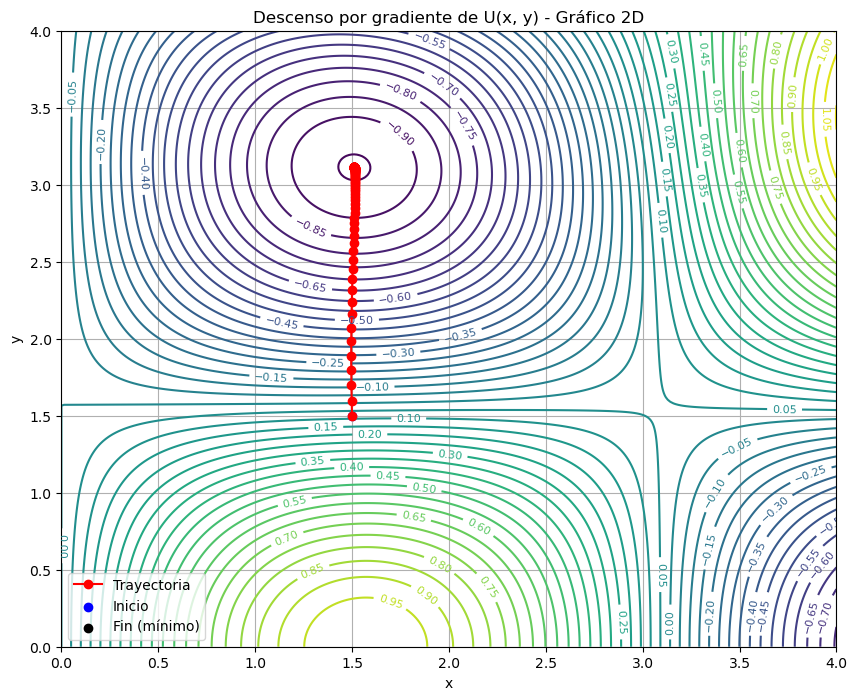

In [10]:
# Graficamos
plt.figure(figsize=(10, 8))
contours = plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path[:, 0], path[:, 1], 'r-o', label='Trayectoria')
plt.scatter(start_point[0], start_point[1], color='blue', label='Inicio')
plt.scatter(path[-1, 0], path[-1, 1], color='black', label='Fin (mínimo)')
plt.title('Descenso por gradiente de U(x, y) - Gráfico 2D')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
